# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



a       cat
b         1
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b    0.057300
c    0.538833
d   -5.549757
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [9]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 15:24:30.060264
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [16]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [17]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00     8.743407
2018-11-20 14:45:00    10.320845
2018-11-21 14:45:00    10.582615
2018-11-22 14:45:00     9.716242
Freq: D, dtype: float64 

2018-11-19 14:45:00     8.743407
2018-11-20 14:45:00    10.320845
2018-11-21 14:45:00    10.582615
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [18]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [19]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,-0.818085,-0.413481,1.072754,0.265346
2018-11-19 15:45:00,0.286683,-0.853765,1.179450,-0.688866
2018-11-19 16:45:00,0.510749,-1.741572,-0.487895,0.243488
2018-11-19 17:45:00,0.636858,2.244054,1.808644,0.633693
2018-11-19 18:45:00,-0.736998,1.190048,2.197711,0.488409
2018-11-19 19:45:00,0.110955,-0.727801,-0.049098,1.522485
2018-11-19 20:45:00,-0.874117,0.225946,1.274133,-1.318626
2018-11-19 21:45:00,0.167968,-2.909869,0.502145,0.867711
2018-11-19 22:45:00,0.614668,0.054193,0.691018,-1.559305
2018-11-19 23:45:00,0.469226,-0.802204,-0.100780,1.152400


or by means of a dictionary:


In [20]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [21]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [22]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-0.818085,-0.413481,1.072754,0.265346
2018-11-19 15:45:00,0.286683,-0.853765,1.179450,-0.688866
2018-11-19 16:45:00,0.510749,-1.741572,-0.487895,0.243488
2018-11-19 17:45:00,0.636858,2.244054,1.808644,0.633693
2018-11-19 18:45:00,-0.736998,1.190048,2.197711,0.488409


In [29]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-0.874117,0.225946,1.274133,-1.318626
2018-11-19 21:45:00,0.167968,-2.909869,0.502145,0.867711
2018-11-19 22:45:00,0.614668,0.054193,0.691018,-1.559305
2018-11-19 23:45:00,0.469226,-0.802204,-0.100780,1.152400


In [30]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [31]:
df.columns
#df.columns=['A', 'Bpippo', 'C', 'D'] #cambia il nome della colonna

Index(['A', 'B', 'C', 'D'], dtype='object')

In [32]:
df.values

array([[-0.818085  , -0.41348118,  1.07275373,  0.26534594],
       [ 0.28668344, -0.85376512,  1.17944962, -0.6888658 ],
       [ 0.51074925, -1.74157164, -0.48789452,  0.24348761],
       [ 0.63685814,  2.24405436,  1.80864392,  0.63369258],
       [-0.73699809,  1.19004834,  2.19771135,  0.48840878],
       [ 0.11095474, -0.7278011 , -0.04909806,  1.52248464],
       [-0.87411722,  0.22594582,  1.27413279, -1.31862586],
       [ 0.16796843, -2.90986872,  0.50214484,  0.86771083],
       [ 0.61466755,  0.0541926 ,  0.6910178 , -1.55930473],
       [ 0.46922633, -0.80220443, -0.10078029,  1.15240037]])

In [33]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.036791,-0.373445,0.808808,0.160673
std,0.610112,1.440867,0.863134,1.030388
min,-0.874117,-2.909869,-0.487895,-1.559305
25%,-0.525010,-0.840875,0.088713,-0.455777
50%,0.227326,-0.570641,0.881886,0.376877
75%,0.500369,0.183008,1.250462,0.809206
max,0.636858,2.244054,2.197711,1.522485


In [34]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-0.818085,0.286683,0.510749,0.636858,-0.736998,0.110955,-0.874117,0.167968,0.614668,0.469226
B,-0.413481,-0.853765,-1.741572,2.244054,1.190048,-0.727801,0.225946,-2.909869,0.054193,-0.802204
C,1.072754,1.179450,-0.487895,1.808644,2.197711,-0.049098,1.274133,0.502145,0.691018,-0.100780
D,0.265346,-0.688866,0.243488,0.633693,0.488409,1.522485,-1.318626,0.867711,-1.559305,1.152400


In [41]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,0.265346,1.072754,-0.413481,-0.818085
2018-11-19 15:45:00,-0.688866,1.179450,-0.853765,0.286683
2018-11-19 16:45:00,0.243488,-0.487895,-1.741572,0.510749
2018-11-19 17:45:00,0.633693,1.808644,2.244054,0.636858
2018-11-19 18:45:00,0.488409,2.197711,1.190048,-0.736998
2018-11-19 19:45:00,1.522485,-0.049098,-0.727801,0.110955
2018-11-19 20:45:00,-1.318626,1.274133,0.225946,-0.874117
2018-11-19 21:45:00,0.867711,0.502145,-2.909869,0.167968
2018-11-19 22:45:00,-1.559305,0.691018,0.054193,0.614668
2018-11-19 23:45:00,1.152400,-0.100780,-0.802204,0.469226


In [42]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 16:45:00,0.510749,-1.741572,-0.487895,0.243488
2018-11-19 23:45:00,0.469226,-0.802204,-0.100780,1.152400
2018-11-19 19:45:00,0.110955,-0.727801,-0.049098,1.522485
2018-11-19 21:45:00,0.167968,-2.909869,0.502145,0.867711
2018-11-19 22:45:00,0.614668,0.054193,0.691018,-1.559305
2018-11-19 14:45:00,-0.818085,-0.413481,1.072754,0.265346
2018-11-19 15:45:00,0.286683,-0.853765,1.179450,-0.688866
2018-11-19 20:45:00,-0.874117,0.225946,1.274133,-1.318626
2018-11-19 17:45:00,0.636858,2.244054,1.808644,0.633693
2018-11-19 18:45:00,-0.736998,1.190048,2.197711,0.488409


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [43]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -0.818085
2018-11-19 15:45:00    0.286683
2018-11-19 16:45:00    0.510749
2018-11-19 17:45:00    0.636858
2018-11-19 18:45:00   -0.736998
2018-11-19 19:45:00    0.110955
2018-11-19 20:45:00   -0.874117
2018-11-19 21:45:00    0.167968
2018-11-19 22:45:00    0.614668
2018-11-19 23:45:00    0.469226
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -0.818085
2018-11-19 15:45:00    0.286683
2018-11-19 16:45:00    0.510749
2018-11-19 17:45:00    0.636858
2018-11-19 18:45:00   -0.736998
2018-11-19 19:45:00    0.110955
2018-11-19 20:45:00   -0.874117
2018-11-19 21:45:00    0.167968
2018-11-19 22:45:00    0.614668
2018-11-19 23:45:00    0.469226
Freq: H, Name: A, dtype: float64


In [44]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00 -0.818085 -0.413481  1.072754  0.265346
2018-11-19 15:45:00  0.286683 -0.853765  1.179450 -0.688866
2018-11-19 16:45:00  0.510749 -1.741572 -0.487895  0.243488
                            A         B         C         D
2018-11-19 14:45:00 -0.818085 -0.413481  1.072754  0.265346
2018-11-19 15:45:00  0.286683 -0.853765  1.179450 -0.688866
2018-11-19 16:45:00  0.510749 -1.741572 -0.487895  0.243488


### Selection by label

In [45]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.818085
B   -0.413481
C    1.072754
D    0.265346
Name: 2018-11-19 14:45:00, dtype: float64

In [46]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,-0.818085,-0.413481
2018-11-19 15:45:00,0.286683,-0.853765
2018-11-19 16:45:00,0.510749,-1.741572
2018-11-19 17:45:00,0.636858,2.244054
2018-11-19 18:45:00,-0.736998,1.190048
2018-11-19 19:45:00,0.110955,-0.727801
2018-11-19 20:45:00,-0.874117,0.225946
2018-11-19 21:45:00,0.167968,-2.909869
2018-11-19 22:45:00,0.614668,0.054193
2018-11-19 23:45:00,0.469226,-0.802204


In [47]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,-0.736998,1.190048
2018-11-19 19:45:00,0.110955,-0.727801
2018-11-19 20:45:00,-0.874117,0.225946


In [48]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.286683442519
0.286683442519


### Selecting by position

In [49]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.636858
B    2.244054
C    1.808644
D    0.633693
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00  0.636858  2.244054
2018-11-19 18:45:00 -0.736998  1.190048


In [50]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,0.286683,1.179450
2018-11-19 16:45:00,0.510749,-0.487895
2018-11-19 18:45:00,-0.736998,2.197711


In [51]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00  0.286683 -0.853765  1.179450 -0.688866
2018-11-19 16:45:00  0.510749 -1.741572 -0.487895  0.243488 

                            B         C
2018-11-19 14:45:00 -0.413481  1.072754
2018-11-19 15:45:00 -0.853765  1.179450
2018-11-19 16:45:00 -1.741572 -0.487895
2018-11-19 17:45:00  2.244054  1.808644
2018-11-19 18:45:00  1.190048  2.197711
2018-11-19 19:45:00 -0.727801 -0.049098
2018-11-19 20:45:00  0.225946  1.274133
2018-11-19 21:45:00 -2.909869  0.502145
2018-11-19 22:45:00  0.054193  0.691018
2018-11-19 23:45:00 -0.802204 -0.100780


In [52]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.85376512261708259

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [53]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 17:45:00,0.636858,2.244054,1.808644,0.633693
2018-11-19 18:45:00,-0.736998,1.190048,2.197711,0.488409
2018-11-19 20:45:00,-0.874117,0.225946,1.274133,-1.318626
2018-11-19 22:45:00,0.614668,0.054193,0.691018,-1.559305


In [54]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,NaN,1.072754,0.265346
2018-11-19 15:45:00,0.286683,NaN,1.179450,NaN
2018-11-19 16:45:00,0.510749,NaN,NaN,0.243488
2018-11-19 17:45:00,0.636858,2.244054,1.808644,0.633693
2018-11-19 18:45:00,NaN,1.190048,2.197711,0.488409
2018-11-19 19:45:00,0.110955,NaN,NaN,1.522485
2018-11-19 20:45:00,NaN,0.225946,1.274133,NaN
2018-11-19 21:45:00,0.167968,NaN,0.502145,0.867711
2018-11-19 22:45:00,0.614668,0.054193,0.691018,NaN
2018-11-19 23:45:00,0.469226,NaN,NaN,1.152400


### Setting

Combination of selection and setting of values

In [55]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [56]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.413481,1.072754,5,0.0,0,1.000000
2018-11-19 15:45:00,0.286683,-0.853765,1.179450,5,0.5,2,0.999962
2018-11-19 16:45:00,0.510749,-1.741572,-0.487895,5,1.0,4,0.999848
2018-11-19 17:45:00,0.636858,2.244054,1.808644,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.736998,1.190048,2.197711,5,2.0,8,0.999391
2018-11-19 19:45:00,0.110955,-0.727801,-0.049098,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.874117,0.225946,1.274133,5,3.0,12,0.998630
2018-11-19 21:45:00,0.167968,-2.909869,0.502145,5,3.5,14,0.998135
2018-11-19 22:45:00,0.614668,0.054193,0.691018,5,4.0,16,0.997564
2018-11-19 23:45:00,0.469226,-0.802204,-0.100780,5,4.5,18,0.996917


In [57]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.413481,-1.072754,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.286683,-0.853765,-1.179450,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.510749,-1.741572,-0.487895,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.636858,-2.244054,-1.808644,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.736998,-1.190048,-2.197711,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-0.110955,-0.727801,-0.049098,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.874117,-0.225946,-1.274133,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-0.167968,-2.909869,-0.502145,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.614668,-0.054193,-0.691018,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.469226,-0.802204,-0.100780,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [64]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

TypeError: drop() got an unexpected keyword argument 'columns'

In [65]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.413481,1.072754,5,0.0,0,1.000000
2018-11-19 19:45:00,0.110955,-0.727801,-0.049098,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.874117,0.225946,1.274133,5,3.0,12,0.998630
2018-11-19 21:45:00,0.167968,-2.909869,0.502145,5,3.5,14,0.998135
2018-11-19 22:45:00,0.614668,0.054193,0.691018,5,4.0,16,0.997564
2018-11-19 23:45:00,0.469226,-0.802204,-0.100780,5,4.5,18,0.996917


In [66]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.413481,1.072754,5,0.0,0,1.000000
2018-11-19 15:45:00,0.286683,-0.853765,1.179450,5,0.5,2,0.999962
2018-11-19 16:45:00,0.510749,-1.741572,-0.487895,5,1.0,4,0.999848
2018-11-19 17:45:00,0.636858,2.244054,1.808644,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.736998,1.190048,2.197711,5,2.0,8,0.999391
2018-11-19 19:45:00,0.110955,-0.727801,-0.049098,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.874117,0.225946,1.274133,5,3.0,12,0.998630
2018-11-19 21:45:00,0.167968,-2.909869,0.502145,5,3.5,14,0.998135
2018-11-19 23:45:00,0.469226,-0.802204,-0.100780,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [70]:
df_wNan = df[df>0].drop(['A', 'C'], axis=1)
df_wNan

,B,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,2.244054,5,1.5,6.0,0.999657
2018-11-19 18:45:00,1.190048,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.225946,5,3.0,12.0,0.998630
2018-11-19 21:45:00,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.054193,5,4.0,16.0,0.997564
2018-11-19 23:45:00,NaN,5,4.5,18.0,0.996917


In [71]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,B,D,E,E prime,cosine
2018-11-19 17:45:00,2.244054,5,1.5,6.0,0.999657
2018-11-19 18:45:00,1.190048,5,2.0,8.0,0.999391
2018-11-19 20:45:00,0.225946,5,3.0,12.0,0.998630
2018-11-19 22:45:00,0.054193,5,4.0,16.0,0.997564


In [72]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

AttributeError: 'DataFrame' object has no attribute 'isna'

In [73]:
# filling missing data
df_wNan.fillna(value=0)

,B,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.000000,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.000000,5,1.0,4.0,0.999848
2018-11-19 17:45:00,2.244054,5,1.5,6.0,0.999657
2018-11-19 18:45:00,1.190048,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.225946,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.000000,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.054193,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [76]:
df_wNan.fillna(method='pad')

,B,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,2.244054,5,1.5,6.0,0.999657
2018-11-19 18:45:00,1.190048,5,2.0,8.0,0.999391
2018-11-19 19:45:00,1.190048,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.225946,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.225946,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.054193,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.054193,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [77]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.118599
B         -0.373445
C          0.808808
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.951325
2018-11-19 15:45:00    1.301761
2018-11-19 16:45:00    1.325876
2018-11-19 17:45:00    2.598459
2018-11-19 18:45:00    2.664307
2018-11-19 19:45:00    2.547586
2018-11-19 20:45:00    3.089227
2018-11-19 21:45:00    3.036911
2018-11-19 22:45:00    3.908206
2018-11-19 23:45:00    4.009023
Freq: H, dtype: float64 



In [78]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.413481,1.072754,5,0.0,0,1.000000
2018-11-19 15:45:00,0.286683,-1.267246,2.252203,10,0.5,2,1.999962
2018-11-19 16:45:00,0.797433,-3.008818,1.764309,15,1.5,6,2.999810
2018-11-19 17:45:00,1.434291,-0.764764,3.572953,20,3.0,12,3.999467
2018-11-19 18:45:00,0.697293,0.425285,5.770664,25,5.0,20,4.998858
2018-11-19 19:45:00,0.808247,-0.302516,5.721566,30,7.5,30,5.997906
2018-11-19 20:45:00,-0.065870,-0.076571,6.995699,35,10.5,42,6.996536
2018-11-19 21:45:00,0.102099,-2.986439,7.497844,40,14.0,56,7.994670
2018-11-19 22:45:00,0.716766,-2.932247,8.188861,45,18.0,72,8.992234
2018-11-19 23:45:00,1.185993,-3.734451,8.088081,50,22.5,90,9.989152


In [79]:
df.apply(lambda x: x.max() - x.min())

A           1.510975
B           5.153923
C           2.685606
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [80]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00   -0.413481
2018-11-19 15:45:00   -0.567082
2018-11-19 16:45:00   -1.230822
2018-11-19 17:45:00    2.880913
2018-11-19 18:45:00    0.453050
2018-11-19 19:45:00   -0.616846
2018-11-19 20:45:00   -0.648171
2018-11-19 21:45:00   -2.741900
2018-11-19 22:45:00    0.668860
2018-11-19 23:45:00   -0.332978
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [82]:
file_name="/home/spiro/home/fioroni/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's know do some operations among (elements of) columns

In [84]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [86]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [87]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [88]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.312461,0.399454,-0.279580,-0.734935
1,0.369822,0.429927,-0.081404,-1.964002
2,-0.674583,-2.150754,0.667702,1.443135
3,0.457483,-1.373720,-1.389192,0.416939
4,2.431967,-1.046966,0.623280,-0.380538
5,-0.576991,-1.144074,1.440146,-1.068249
6,-0.694059,-1.118301,-0.965174,-0.618086
7,-0.008424,0.518210,-0.576845,0.660315
8,2.006330,0.110644,0.868175,-0.067248
9,-0.248150,0.958701,0.511927,-0.284619


In [89]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.312461  0.399454 -0.279580 -0.734935
 1  0.369822  0.429927 -0.081404 -1.964002
 2 -0.674583 -2.150754  0.667702  1.443135,
           0         1         2         3
 3  0.457483 -1.373720 -1.389192  0.416939
 4  2.431967 -1.046966  0.623280 -0.380538
 5 -0.576991 -1.144074  1.440146 -1.068249
 6 -0.694059 -1.118301 -0.965174 -0.618086,
           0         1         2         3
 7 -0.008424  0.518210 -0.576845  0.660315
 8  2.006330  0.110644  0.868175 -0.067248
 9 -0.248150  0.958701  0.511927 -0.284619]

In [90]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.312461,0.399454,-0.279580,-0.734935
1,0.369822,0.429927,-0.081404,-1.964002
2,-0.674583,-2.150754,0.667702,1.443135
3,0.457483,-1.373720,-1.389192,0.416939
4,2.431967,-1.046966,0.623280,-0.380538
5,-0.576991,-1.144074,1.440146,-1.068249
6,-0.694059,-1.118301,-0.965174,-0.618086
7,-0.008424,0.518210,-0.576845,0.660315
8,2.006330,0.110644,0.868175,-0.067248
9,-0.248150,0.958701,0.511927,-0.284619


In [91]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,1.312461,0.399454,-0.279580,-0.734935
1,0.369822,0.429927,-0.081404,-1.964002
2,-0.674583,-2.150754,0.667702,1.443135
3,0.457483,-1.373720,-1.389192,0.416939
4,2.431967,-1.046966,0.623280,-0.380538
5,-0.576991,-1.144074,1.440146,-1.068249
6,-0.694059,-1.118301,-0.965174,-0.618086
7,-0.008424,0.518210,-0.576845,0.660315
8,2.006330,0.110644,0.868175,-0.067248
9,-0.248150,0.958701,0.511927,-0.284619


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [92]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [93]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.601578,-0.284679
1,bar,one,1.557442,0.249724
2,foo,two,-0.921640,0.669437
3,bar,three,-1.059819,3.356302
4,foo,two,-0.929377,-0.127814
5,bar,two,-0.169437,1.319613
6,foo,one,0.081863,-0.143922
7,foo,three,0.045751,-0.513344


In [94]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.328187,4.925640
foo,-3.324981,-0.400321


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [96]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one       0.502939
       two      -0.093334
baz    one       0.231024
       two      -1.939354
foo    one      -0.045968
       two      -0.807070
qux    one       0.472918
       two      -1.396504
dtype: float64


In [97]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.557442  0.249724
    three -1.059819  3.356302
    two   -0.169437  1.319613
foo one   -1.519714 -0.428601
    three  0.045751 -0.513344
    two   -1.851017  0.541624

In [98]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.557442
            D    0.249724
     three  C   -1.059819
            D    3.356302
     two    C   -0.169437
            D    1.319613
foo  one    C   -1.519714
            D   -0.428601
     three  C    0.045751
            D   -0.513344
     two    C   -1.851017
            D    0.541624
dtype: float64

## Plotting

Just a preview, more on the next lab class!

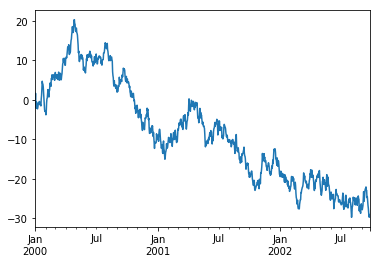

In [103]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

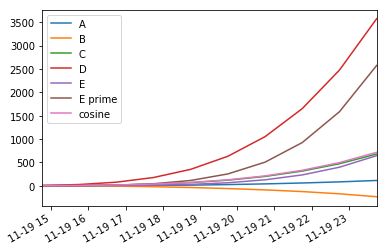

In [105]:
import matplotlib.pyplot as plt
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')